# Dive into Deep Learning
# Ch 8. Modern Convolution Neural Networks ( 현대 합성곱 신경망 )


This chapter covers a tour of modern Convolutional Neural Network (CNN) architectures, starting with AlexNet and including VGG, Network in Network (NiN) and others. 

- 이 장은 AlexNet부터 시작하여 VGG, Network in Network (NiN) 및 여러 현대적인 합성곱 신경망(CNN) 구조들의 소개를 다룹니다. 

It also discusses the process of designing CNN architectures and introduces the AnyNet design space and RegNet.

- 또한 CNN 구조를 설계하는 과정과 AnyNet 디자인 공간과 RegNet을 소개하는 내용을 다룹니다.



# Deep Convolutional Neural Networks - AlexNet  ( 심층 합성곱 신경망 )

Although CNNs were well known in the computer vision and machine learning communities following the introduction of LeNet (LeCun et al., 1995), they did not immediately dominate the field.

- LeNet(LeCun 등, 1995) 소개 이후로 CNN은 컴퓨터 비전 및 머신 러닝 커뮤니티에서 잘 알려졌지만, 즉시 분야를 지배하지는 않았습니다.

Although LeNet achieved good results on early small datasets, the performance and feasibility of training CNNs on larger, more realistic datasets had yet to be established. 

- LeNet은 초기 작은 데이터셋에서 좋은 결과를 얻었지만, 더 크고 현실적인 데이터셋에서의 CNN 훈련의 성능과 실행 가능성은 아직 입증되지 않았습니다.

<br>
For computer vision, this comparison is perhaps not entirely accurate. 

- 컴퓨터 비전에 대해 이 비교는 아마 완전히 정확하지 않을 수 있습니다. 

That is, although the inputs to convolutional networks consist of raw or lightly-processed (e.g., by centering) pixel values, practitioners would never feed raw pixels into traditional models. 

- 즉, 합성곱 신경망에 입력되는 것은 원시적이거나 가벼운 전처리(예: 중앙 맞춤)된 픽셀 값들이지만, 실제로 전통적인 모델에는 절대로 원시적인 픽셀 값을 넣지 않았습니다.

Instead, typical computer vision pipelines consisted of manually engineering feature extraction pipelines, such as SIFT (Lowe, 2004), SURF (Bay et al., 2006), and bags of visual words (Sivic and Zisserman, 2003). 

- 대신, 전형적인 컴퓨터 비전 파이프라인은 SIFT (Lowe, 2004), SURF (Bay 등, 2006) 및 시각적 단어들의 가방 (Sivic 및 Zisserman, 2003)과 같은 수작업으로 특성 추출 파이프라인으로 구성되었습니다. 

Rather than learning the features, the features were crafted.

- 특성을 학습하는 대신, 특성은 수작업으로 만들어졌습니다.

Most of the progress came from having more clever ideas for feature extraction on the one hand and deep insight into geometry (Hartley and Zisserman, 2000) on the other hand. 

- 발전의 대부분은 한쪽으로는 특성 추출에 대한 더욱 재치있는 아이디어들, 다른 한쪽으로는 기하학에 대한 깊은 통찰력으로부터 이루어졌습니다. 


## AlexNet

AlexNet, which employed an 8-layer CNN, won the ImageNet Large Scale Visual Recognition Challenge 2012 by a large margin (Russakovsky et al., 2013). 

- 알렉스넷은 8개의 레이어를 가진 합성곱 신경망(CNN)을 사용한 것으로, 2012년 ImageNet 대규모 시각 인식 챌린지에서 큰 차이로 우승했습니다 (Russakovsky 등, 2013).

This network showed, for the irst time, that the features obtained by learning can transcend manually-designed features, breaking the previous paradigm in computer vision.

- 이 네트워크는 처음으로 학습에 의해 얻은 특징이 수동으로 설계된 특징을 초월할 수 있다는 것을 보여주었으며, 컴퓨터 비전에서 이전의 패러다임을 깨는 역할을 했습니다.

<img src="http://d2l.ai/_images/alexnet.svg" alt="From LeNet (left) to AlexNet (right)." width="200">


The architectures of AlexNet and LeNet are strikingly similar, as shown in the figure above.

- AlexNet과 LeNet의 아키텍처는 위의 그림에서 보여지듯이 놀랍도록 유사합니다.

Note that we provide a slightly streamlined version of AlexNet removing some of the design quirks that were needed in 2012 to make the model fit on two small GPUs.

- 모델을 2개의 작은 GPU에 맞추기 위해 2012년에 필요했던 일부 디자인 문제를 제거한 AlexNet의 약간 간소화된 버전을 제공합니다.

There are also significant differences between AlexNet and LeNet.

- AlexNet과 LeNet 사이에는 상당한 차이점도 있습니다.

First, AlexNet is much deeper than the comparatively small LeNet5. 

- 첫째, AlexNet은 비교적 작은 LeNet5보다 훨씬 더 깊습니다.

AlexNet consists of eight layers: five convolutional layers, two fully connected hidden layers, and one fully connected output layer.

- AlexNet은 총 여덟 개의 레이어로 구성되어 있습니다: 다섯 개의 합성곱 레이어, 두 개의 완전 연결된 은닉 레이어, 그리고 하나의 완전 연결된 출력 레이어로 이루어져 있습니다.

Second, AlexNet used the ReLU instead of the sigmoid as its activation function.

- 둘째, AlexNet은 활성화 함수로 시그모이드 대신 ReLU를 사용했습니다.


### Activation Functions ( 활성화 기능 )

AlexNet changed the sigmoid activation function to a simpler ReLU activation function.

- 알렉스넷은 시그모이드 활성화 함수를 더 간단한 ReLU 활성화 함수로 변경했습니다.

When the output of the sigmoid activation function is very close to 0 or 1, the gradient of these regions is almost 0, so that backpropagation cannot continue to update some of the model parameters. 

- 시그모이드 활성화 함수의 출력이 0 또는 1에 매우 가까운 경우, 해당 영역의 기울기는 거의 0이 되어 역전파가 일부 모델 매개 변수를 계속 업데이트할 수 없습니다.

In contrast, the gradient of the ReLU activation function in the positive interval is always 1. 

- 반면, 양의 범위에서 ReLU 활성화 함수의 기울기는 항상 1입니다.

Therefore, if the model parameters are not properly initialized, the sigmoid function may obtain a gradient of almost 0 in the positive interval, so that the model cannot be effectively trained.

- 따라서 모델 매개 변수가 적절하게 초기화되지 않은 경우, 시그모이드 함수는 양의 범위에서 거의 0에 가까운 기울기를 얻어 모델을 효과적으로 훈련시키지 못할 수 있습니다.

### Capacity Control and Preprocessing

AlexNet controls the model complexity of the fully connected layer by dropout (Section 5.6), while LeNet only uses weight decay.

- AlexNet은 드롭아웃(섹션 5.6)에 의해 완전히 연결된 계층의 모델 복잡성을 제어하는 반면 LeNet은 가중치 감쇠만 사용합니다.

To augment the data even further, the training loop of AlexNet added a great deal of image augmentation, such as flipping, clipping, and color changes. 

- 데이터를 더욱 강화하기 위해 AlexNet의 훈련 루프는 뒤집기, 클리핑 및 색상 변경과 같은 많은 이미지 확대를 추가했습니다.


This makes the model more robust and the larger sample size effectively reduces overfitting.

- 이는 모델을 더욱 강력하게 만들고 더 큰 샘플 크기로 과적합을 효과적으로 줄입니다.

In [1]:
import torch
from torch import nn
from d2l import torch as d2l
from torch.nn import functional as F

class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        # AlexNet 모델의 구조를 정의합니다
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),  # 1번째 합성곱 층
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),  # 풀링 층
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),  # 2번째 합성곱 층
            nn.MaxPool2d(kernel_size=3, stride=2),  # 풀링 층
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),  # 3번째 합성곱 층
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),  # 4번째 합성곱 층
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),  # 5번째 합성곱 층
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),  # 풀링 층 및 플래튼
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),  # 완전 연결 층 1
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),  # 완전 연결 층 2
            nn.LazyLinear(num_classes))  # 최종 예측을 위한 완전 연결 층
        self.net.apply(d2l.init_cnn)  # 가중치 초기화
        
# AlexNet 모델의 구조를 요약하여 출력합니다
AlexNet().layer_summary((1, 1, 224, 224))

/home/nplab/.local/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

We construct a single-channel data example with both height and width of 224 to observe the output shape of each layer. It matches the AlexNet architecture in the figure above.

- 각 레이어의 출력 모양을 관찰하기 위해 높이와 너비가 모두 224인 단일 채널 데이터 예제를 구성합니다. 위의 AlexNet 아키텍처와 일치합니다.


## Training


Although AlexNet was trained on ImageNet in :citet:`Krizhevsky.Sutskever.Hinton.2012`, we use Fashion-MNIST here since training an ImageNet model to convergence could take hours or days even on a modern GPU.

- AlexNet은 원래 :citet:Krizhevsky.Sutskever.Hinton.2012에서 ImageNet에 훈련되었지만, 현대 GPU를 사용하더라도 ImageNet 모델을 수렴시키는 데 몇 시간 또는 몇 일이 걸릴 수 있기 때문에 여기서는 Fashion-MNIST를 사용합니다.

One of the problems with applying AlexNet directly on Fashion-MNIST is that its images have lower resolution ($28 \times 28$ pixels) than ImageNet images.

- Fashion-MNIST에 AlexNet을 직접 적용하는 것의 문제점 중 하나는 그것의 이미지 해상도가 ($28 \times 28$ 픽셀) ImageNet의 이미지보다 낮다는 것입니다.

To make things work, we upsample them to $224 \times 224$.

- 이 문제를 해결하기 위해, 이미지를 $224 \times 224$로 업샘플링합니다.

This is generally not a smart practice, as it simply increases the computational complexity without adding information.

- 이것은 일반적으로 추천되지 않는 방법입니다. 왜냐하면 이는 정보를 추가하지 않고 계산 복잡성만 증가시키기 때문입니다.

Nonetheless, we do it here to be faithful to the AlexNet architecture.

- 그럼에도 불구하고, 우리는 AlexNet 아키텍처에 충실하기 위해 이렇게 합니다.

We perform this resizing with the `resize` argument in the `d2l.FashionMNIST` constructor.

- 이 이미지 리사이징은 d2l.FashionMNIST 생성자의 resize 인자를 사용하여 수행됩니다.

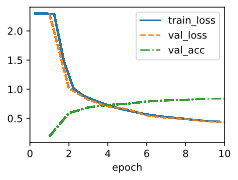

In [2]:
model = AlexNet(lr=0.01)  # AlexNet 모델을 학습하기 위해 인스턴스를 생성합니다. 학습률은 0.01로 설정됩니다.
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))  # FashionMNIST 데이터셋을 불러옵니다. 배치 크기는 128로 설정되며 이미지 크기는 224x224로 변경됩니다.
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)  # 트레이너 객체를 생성합니다. 최대 에포크는 10으로 설정되며 GPU를 1개 사용합니다.
trainer.fit(model, data)  # 모델을 학습시키는 메서드입니다.

# Networks Using Blocks (VGG) 


The idea of using blocks first emerged from the Visual Geometry Group (VGG) at Oxford University, in their eponymously-named VGG network (Simonyan and Zisserman, 2014). 

- 블록을 사용한다는 아이디어는 옥스포드 대학의 VGG(Visual Geometry Group)에서 VGG 네트워크라는 이름으로 처음 등장했습니다(Simonyan and Zisserman, 2014).

It is easy to implement these repeated structures in code with any modern deep learning framework by using loops and subroutines.

- 이 반복되는 구조는 현대 딥러닝 프레임워크를 사용하여 루프와 서브루틴을 사용함으로써 코드에서 쉽게 구현할 수 있습니다.


## VGG Blocks

A VGG block consists of a sequence of convolutions with $3\times3$ kernels with padding of 1 (keeping height and width) followed by a $2 \times 2$ max-pooling layer with stride of 2 (halving height and width after each block).

- VGG 블록은 패딩이 1인 $3\times3$ 커널로의 연속된 합성곱 (높이와 넓이 유지)과 이어지는 보폭이 2인 $2 \times 2$ 최대 풀링 레이어로 구성됩니다 (각 블록 후에 높이와 넓이를 절반으로 줄입니다).

In the code below, we define a function called vgg_blockto implement one VGG block.

- 아래 코드에서는 하나의 VGG 블록을 구현하기 위한 함수인 vgg_block을 정의합니다.

The function below takes two arguments, corresponding to the number of convolutional layers num_convs and the number of output channels num_channels.

- 아래 함수는 합성곱 레이어의 수 num_convs와 출력 채널의 수 num_channels에 해당하는 두 개의 인수를 받습니다.

In [3]:
def vgg_block(num_convs, out_channels):
    layers = []  # 빈 리스트 생성
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())  # Convolutional 레이어와 ReLU 활성화 함수 연속 추가
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))  # Max Pooling 레이어 추가
    return nn.Sequential(*layers)  # 생성된 레이어들을 순차적으로 연결하여 블록 반환

## VGG Network

Like AlexNet and LeNet, the VGG Network can be partitioned into two parts: the first consisting mostly of convolutional and pooling layers and the second consisting of fully connected layers that are identical to those in AlexNet.

AlexNet과 LeNet과 마찬가지로, VGG 네트워크는 두 부분으로 나눌 수 있습니다: 첫 번째 부분은 주로 합성곱 및 풀링 레이어로 구성되어 있으며, 두 번째 부분은 AlexNet의 완전 연결 레이어와 동일합니다.

The key difference is that the convolutional layers are grouped in nonlinear transformations that leave the dimensonality unchanged, followed by a resolution-reduction step, as depicted in Figure below.


주요 차이점은 합성곱 레이어가 차원성이 변하지 않도록 비선형 변환으로 그룹화되며, 이어서 해상도 감소 단계가 따르는데, 이는 아래 그림에서 보여지는 것처럼 나타납니다.

<img src="http://d2l.ai/_images/vgg.svg" alt="From AlexNet to VGG. The key difference is that VGG consists of blocks of layers, whereas AlexNet's layers are all designed individually." width="400">



The convolutional part of the network connects several VGG blocks as shown in the figure above (also defined in the vgg_block function) in succession.

- 네트워크의 합성곱 부분은 연속으로 여러 VGG 블록을 연결하며, 이 블록들은 위의 그림에서 보여집니다.(또한 vgg_block 함수에서 정의됨)

This grouping of convolutions is a pattern that has remained almost unchanged over the past decade, although the specific choice of operations has undergone considerable modifications. 

- 이러한 합성곱의 그룹화는 특정 연산의 선택이 상당한 수정을 거쳤지난 10년 동안 거의 변하지 않은 패턴입니다.

The variable conv_arch consists of a list of tuples (one per block), where each contains two values: the number of convolutional layers and the number of output channels, which are precisely the arguments required to call the vgg_block function.

- 변수 conv_arch는 튜플의 목록(블록당 하나)으로 구성되며, 각 튜플에는 두 개의 값이 포함됩니다: 합성곱 레이어의 수와 출력 채널의 수, 이는 바로 vgg_block 함수를 호출하는 데 필요한 인수들입니다.

As such, VGG defines a family of networks rather than just a specific manifestation. 

- 따라서 VGG는 특정 현상이 아닌 네트워크의 계열을 정의합니다. 


To build a specific network we simply iterate over arch to compose the blocks.

- 특정 네트워크를 구축하기 위해 우리는 단순히 arch를 반복하여 블록을 구성합니다.

In [4]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()  # 부모 클래스 초기화
        
        self.save_hyperparameters()  # 하이퍼파라미터 저장
        
        conv_blks = []  # 빈 리스트 생성하여 컨볼루션 블록들을 담을 준비
        
        # 주어진 arch에서 (num_convs, out_channels) 쌍을 반복
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))  
            # vgg_block 함수를 사용하여 컨볼루션 블록 생성 후 리스트에 추가
        
        # 컨볼루션 블록들을 포함하는 네트워크 정의
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        
        self.net.apply(d2l.init_cnn)  # 네트워크 가중치 초기화

The original VGG network had 5 convolutional blocks, among which the first two have one convolutional layer each and the latter three contain two convolutional layers each.


- 원래 VGG 네트워크에는 5개의 합성곱 블록이 있으며, 이 중 처음 두 블록은 각각 합성곱 레이어 하나를 가지고 있고, 나중의 세 블록은 각각 두 개의 합성곱 레이어를 포함하고 있습니다.

The first block has 64 output channels and each subsequent block doubles the number of output channels, until that number reaches 512. 

- 첫 번째 블록에는 64개의 출력 채널이 있고 각 후속 블록은 그 수가 512에 도달할 때까지 출력 채널 수를 두 배로 늘립니다.

Since this network uses 8 convolutional layers and 3 fully connected layers, it is often called VGG-11. 

- 이 네트워크는 8개의 합성곱 레이어와 3개의 완전 연결 레이어를 사용하기 때문에, 종종 VGG-11로 불립니다.

In [5]:
# VGG 모델 생성 및 레이어 요약 출력
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


As you can see, we halve height and width at each block, finally reaching a height and width of 7 before flattening the representations for processing by the fully connected part of the network. 

- 보시다시피, 각 블록에서 높이와 너비를 절반으로 줄였고, 네트워크의 완전 연결 부분에서 처리하기 위해 표현을 평면화하기 전에 7의 높이와 너비에 도달합니다.

Simonyan and Zisserman (2014) described several other variants of VGG. 

- Simonyan과 Zisserman (2014)은 VGG의 여러 다른 변형에 대해 설명하였습니다.

In fact, it has become the norm to propose families of networks with different speed–accuracy trade-off when introducing a new architecture.

- 실제로 새로운 아키텍처를 소개할 때 다른 속도-정확도 트레이드오프를 가진 네트워크의 가족을 제안하는 것이 표준이 되었습니다.


### Training

Since VGG-11 is computationally more demanding than AlexNet we construct a network with a smaller number of channels. 

- VGG-11은 AlexNet보다 계산적으로 더 까다롭기 때문에 더 적은 수의 채널로 네트워크를 구성합니다.

This is more than sufficient for training on Fashion-MNIST. 

- 이것은 Fashion-MNIST 데이터셋에 대해 충분합니다.

The model training process is similar to that of AlexNet. 

- 모델 학습 과정은 8.1절의 AlexNet과 유사합니다.

Again observe the close match between validation and training loss, suggesting only a small amount of overfitting.

- 다시 한번 검증 손실과 학습 손실 사이의 근접한 일치를 관찰하며, 오버피팅이 거의 없다는 것을 시사합니다.

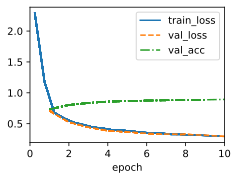

In [6]:
# VGG 모델 생성
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)

# 학습 환경 설정
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)

# FashionMNIST 데이터 로드 및 전처리 설정
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))

# 초기화를 위한 데이터 샘플로 모델 가중치 초기화
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)

# 모델 훈련
trainer.fit(model, data)

# Network in Network (NiN)

The network in network (NiN)  were proposed based on a very simple insight: (i) use $1 \times 1$ convolutions to add local nonlinearities across the channel activations and (ii) use global average pooling to integrate across all locations in the last representation layer. 

- 네트워크 내 네트워크(NiN)는 매우 간단한 통찰력을 기반으로 제안되었습니다: (i) 채널 활성화 간에 지역적인 비선형성을 추가하기 위해 $1 \times 1$ 컨볼루션을 사용하고 (ii) 마지막 표현층의 모든 위치를 통합하기 위해 전역 평균 풀링을 사용합니다.

Note that global average pooling would not be effective, were it not for the added nonlinearities. Let’s dive into this in detail.

- 마지막 표현층에서 전역 평균 풀링이 효과적이지 않았다면 추가된 비선형성 때문입니다. 

## NiN Blocks

The idea behind NiN is to apply a fully connected layer at each pixel location (for each height and width).

- NiN의 기본 아이디어는 각 픽셀 위치(각 높이와 너비에 대해)에 완전히 연결된 레이어를 적용하는 것입니다.

The resulting $1 \times 1$ convolution can be thought of as a fully connected layer acting independently on each pixel location.

- 결과적으로 얻어지는 $1 \times 1$ 컨볼루션은 각 픽셀 위치에서 독립적으로 작용하는 완전히 연결된 레이어로 생각할 수 있습니다.

Figure below illustrates the main structural differences between VGG and NiN, and their blocks.

- 아래 그림은 VGG와 NiN 그리고 그들의 블록들 간의 주요 구조적 차이를 보여줍니다.

Note both the difference in the NiN blocks (the initial convolution is followed by $1 \times 1$ convolutions, whereas VGG retains $3 \times 3$ convolutions) and at the end where we no longer require a giant fully connected layer.

- NiN 블록의 차이점 (처음의 컨볼루션 뒤에 $1 \times 1$ 컨볼루션이 따르며, VGG는 여전히 $3 \times 3$ 컨볼루션을 유지)과 끝 부분에서 우리가 더 이상 거대한 완전 연결 레이어가 필요하지 않은 점에 주목하세요.


<img src="http://d2l.ai/_images/nin.svg" alt="Comparing the architectures of VGG and NiN, and of their blocks." width="400">

In [7]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

## NiN Model

NiN uses the same initial convolution sizes as AlexNet (it was proposed shortly thereafter). 

- NiN는 AlexNet과 동일한 초기 컨볼루션 크기를 사용합니다 (그 직후에 제안됨).

The kernel sizes are $11\times 11$, $5\times 5$, and $3\times 3$, respectively, and the numbers of output channels match those of AlexNet. 

- 커널 크기는 각각 $11\times 11$, $5\times 5$, $3\times 3$이며, 출력 채널의 수는 AlexNet과 일치합니다.

Each NiN block is followed by a max-pooling layer with a stride of 2 and a window shape of $3\times 3$.

- 각 NiN 블록 다음에는 보폭이 2이고 창 모양이 $3\times 3$인 맥스 풀링 레이어가 따릅니다.

The second significant difference between NiN and both AlexNet and VGG is that NiN avoids fully connected layers altogether. 

- NiN과 AlexNet 및 VGG 간의 두 번째 중요한 차이점은 NiN이 완전히 연결된 레이어를 전혀 사용하지 않는다는 것입니다.

Instead, NiN uses a NiN block with a number of output channels equal to the number of label classes, followed by a global average pooling layer, yielding a vector of logits. 

- 대신, NiN은 라벨 클래스의 수와 동일한 출력 채널 수를 가진 NiN 블록을 사용하고 이어서 전역 평균 풀링 레이어를 사용하여 로짓 벡터를 생성합니다.

This design significantly reduces the number of required model parameters, albeit at the expense of a potential increase in training time.

- 이 디자인은 모델 파라미터 수를 상당히 줄이지만, 훈련 시간의 잠재적인 증가를 감수해야 합니다.

In [8]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()  # 부모 클래스 초기화
        
        self.save_hyperparameters()  # 하이퍼파라미터 저장
        
        # NiN 블록을 순차적으로 구성하여 네트워크 정의
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())
        
        self.net.apply(d2l.init_cnn)  # 네트워크 가중치 초기화


We create a data example to see the output shape of each block.

- 각 블록의 출력 형태를 보기 위해 데이터 예제를 생성합니다.

In [9]:
# NiN 모델 생성 및 레이어 요약 출력
NiN().layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


As before we use Fashion-MNIST to train the model using the same optimizer that we used for AlexNet and VGG.

- 이전과 마찬가지로, 우리는 AlexNet과 VGG에 사용한 것과 동일한 옵티마이저를 사용하여 Fashion-MNIST를 사용하여 모델을 훈련합니다.

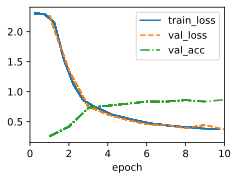

In [10]:
# NiN 모델 생성
model = NiN(lr=0.05)

# 학습 환경 설정
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)

# FashionMNIST 데이터 로드 및 전처리 설정
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))

# 초기화를 위한 데이터 샘플로 모델 가중치 초기화
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)

# 모델 훈련
trainer.fit(model, data)

# Multi-Branch Networks (GoogLeNet)

In 2014, GoogLeNet won the ImageNet Challenge (Szegedy et al., 2015), using a structure that combined the strengths of NiN(Lin et al., 2013), repeated blocks (Simonyan and Zisserman, 2014), and a cocktail of convolution kernels. 

- 2014년 GoogleLeNet은 NiN(Lin et al., 2013), 반복 블록(Simonyan and Zisserman, 2014) 및 컨볼루션 커널의 칵테일을 결합한 구조를 사용하여 ImageNet Challenge(Szegedy et al., 2015)에서 우승했습니다.

It was arguably also the first network that exhibited a clear distinction among the stem (data ingest), body (data processing), and head (prediction) in a CNN. 

- 또한 CNN에서 줄기(데이터 섭취), 몸통(데이터 처리) 및 머리(예측) 사이에 명확한 차이를 보인 최초의 네트워크였습니다.

## Inception Blocks

The basic convolutional block in GoogLeNet is called an Inception block, stemming from the meme “we need to go deeper” from the movie Inception.

- GoogLeNet의 기본 합성곱 블록은 '인셉션 블록'이라고 불립니다. 이 이름은 영화 '인셉션'에서 나온 "우리는 더 깊게 들어가야 한다" 밈에서 유래했습니다.

<br>


![Structure of the Inception block.](http://d2l.ai/_images/inception.svg)

<br>

As depicted in Figure above, the inception block consists of four parallel branches. 

- 위 그림에 나타난대로, 인셉션 블록은 네 개의 병렬 분기로 구성됩니다.

The first three branches use convolutional layers with window sizes of $1\times 1$, $3\times 3$, and $5\times 5$ to extract information from different spatial sizes.

- 첫 번째 세 분기는 $1\times 1$, $3\times 3$, $5\times 5$ 크기의 윈도우를 사용하는 컨볼루션 레이어를 사용하여 서로 다른 공간 크기에서 정보를 추출합니다.

The middle two branches also add a $1\times 1$ convolution of the input to reduce the number of channels, reducing the model's complexity.

- 중간 두 분기는 또한 입력의 $1\times 1$ 컨볼루션을 추가하여 채널 수를 줄여 모델의 복잡도를 낮춥니다.

The fourth branch uses a $3\times 3$ max-pooling layer, followed by a $1\times 1$ convolutional layer to change the number of channels.

- 네 번째 분기는 $3\times 3$ 맥스 풀링 레이어를 사용한 뒤, 채널 수를 변경하기 위해 $1\times 1$ 컨볼루션 레이어를 사용합니다.

The four branches all use appropriate padding to give the input and output the same height and width.

- 네 분기 모두 입력과 출력에 동일한 높이와 너비를 제공하기 위해 적절한 패딩을 사용합니다.

Finally, the outputs along each branch are concatenated along the channel dimension and comprise the block's output.

- 마지막으로, 각 분기의 출력은 채널 차원을 따라 연결되어 블록의 출력을 구성합니다.

The commonly-tuned hyperparameters of the Inception block are the number of output channels per layer, i.e., how to allocate capacity among convolutions of different size.

- 인셉션 블록의 일반적으로 조정되는 하이퍼파라미터는 각 레이어의 출력 채널 수입니다. 즉, 다른 크기의 컨볼루션에 대한 용량 할당 방법을 나타냅니다.

In [11]:
class Inception(nn.Module):
    # c1--c4는 각 브랜치의 출력 채널 수입니다.
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # 브랜치 1
        self.b1_1 = nn.LazyConv2d(c1, kernel_size=1)
        # 브랜치 2
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)
        # 브랜치 3
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)
        # 브랜치 4
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)

    def forward(self, x):
        b1 = F.relu(self.b1_1(x))  # 브랜치 1 실행 후 ReLU 활성화 함수 적용
        b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))  # 브랜치 2 실행 후 ReLU 활성화 함수 적용
        b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))  # 브랜치 3 실행 후 ReLU 활성화 함수 적용
        b4 = F.relu(self.b4_2(self.b4_1(x)))  # 브랜치 4 실행 후 ReLU 활성화 함수 적용
        return torch.cat((b1, b2, b3, b4), dim=1)  # 모든 브랜치 결과를 차원 1을 따라 연결하여 반환

## GoogLeNet Model

As shown in Figure below, GoogLeNet uses a stack of a total of 9 inception blocks, arranged into three groups with max-pooling in between, and global average pooling in its head to generate its estimates. 

- 아래 그림에서 볼 수 있듯이, GoogLeNet은 총 9개의 인셉션 블록을 스택으로 쌓아서 사용하며, 이를 세 개의 그룹으로 배열하고 그 사이에 맥스 풀링을 사용하며, 머리 부분에서 전역 평균 풀링을 사용하여 추정치를 생성합니다.

Max-pooling between inception blocks reduces the dimensionality. At its stem, the first module is similar to AlexNet and LeNet.

- 인셉션 블록 간의 맥스 풀링은 차원을 줄입니다. 초기 부분에서 첫 번째 모듈은 AlexNet과 LeNet과 유사합니다.

![The GoogLeNet architecture.](https://d2l.ai/_images/inception-full-90.svg)

We can now implement GoogLeNet piece by piece. Let's begin with the stem.

- 이제 GoogLeNet을 조각조각 구현해볼 수 있습니다. 시작은 첫 모듈인 스템부터 해보겠습니다.

In [12]:
class GoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

The first module uses a 64-channel $7\times 7$ convolutional layer.

- 첫 번째 모듈은 64채널의 $7\times 7$ 컨볼루션 레이어를 사용합니다.

In [13]:
@d2l.add_to_class(GoogleNet)
def b2(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

The second module uses two convolutional layers: first, a 64-channel $1\times 1$ convolutional layer, followed by a $3\times 3$ convolutional layer that triples the number of channels. 

- 두 번째 모듈은 두 개의 컨볼루션 레이어를 사용합니다. 먼저, 64채널의 $1\times 1$ 컨볼루션 레이어가 이어지고, 그 뒤에 채널 수를 세 배로 늘리는 $3\times 3$ 컨볼루션 레이어가 따릅니다.

This corresponds to the second branch in the Inception block and concludes the design of the body. At this point we have 192 channels.

- 이는 인셉션 블록의 두 번째 분기에 해당하며, 본문(body)의 설계를 완료합니다. 이 시점에서 우리는 192개의 채널을 갖게 됩니다.

In [14]:
@d2l.add_to_class(GoogleNet)
def b3(self):
    return nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                         Inception(128, (128, 192), (32, 96), 64),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

The third module connects two complete Inception blocks in series.

- 세 번째 모듈은 두 개의 완전한 Inception 블록을 직렬로 연결합니다.

The number of output channels of the first Inception block is $64+128+32+32=256$. 

- 첫 번째 인셉션 블록의 출력 채널 수는 $64+128+32+32=256$입니다.

This amounts to a ratio of the number of output channels among the four branches of $2:4:1:1$. 

- 이는 네 가지 분기 간의 출력 채널 수 비율이 $2:4:1:1$임을 의미합니다.

To achieve this, we first reduce the input dimensions by $\frac{1}{2}$ and by $\frac{1}{12}$ in the second and third branch respectively to arrive at $96 = 192/2$ and $16 = 192/12$ channels respectively.

- 이를 위해, 먼저 두 번째와 세 번째 분기에서 각각 입력 차원을 $\frac{1}{2}$와 $\frac{1}{12}$로 줄여 각각 $96 = 192/2$ 및 $16 = 192/12$ 채널에 도달합니다.

The number of output channels of the second Inception block is increased to $128+192+96+64=480$, yielding a ratio of $128:192:96:64 = 4:6:3:2$. 

- 두 번째 인셉션 블록의 출력 채널 수는 $128+192+96+64=480$으로 증가되어, 비율은 $128:192:96:64 = 4:6:3:2$입니다.

As before, we need to reduce the number of intermediate dimensions in the second and third channel. 

- 이전과 마찬가지로, 두 번째와 세 번째 채널에서 중간 차원 수를 줄여야 합니다.

A scale of $\frac{1}{2}$ and $\frac{1}{8}$ respectively suffices, yielding $128$ and $32$ channels respectively. 

- 각각 $\frac{1}{2}$와 $\frac{1}{8}$의 비율이 적당하여, 각각 $128$과 $32$ 채널을 얻게 됩니다.

This is captured by the arguments of the following `Inception` block constructors.

- 이는 다음 Inception 블록 생성자의 인수로 표현됩니다.

In [15]:
@d2l.add_to_class(GoogleNet)
def b4(self):
    return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                         Inception(160, (112, 224), (24, 64), 64),
                         Inception(128, (128, 256), (24, 64), 64),
                         Inception(112, (144, 288), (32, 64), 64),
                         Inception(256, (160, 320), (32, 128), 128),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

The fourth module is more complicated.

- 네 번째 모듈은 좀 더 복잡합니다.

It connects five Inception blocks in series, and they have $192+208+48+64=512$, $160+224+64+64=512$, $128+256+64+64=512$, $112+288+64+64=528$, and $256+320+128+128=832$ output channels, respectively.

- 이 모듈은 다섯 개의 인셉션 블록을 연속으로 연결하며, 각각 $192 + 208 + 48 + 64 = 512$, $160 + 224 + 64 + 64 = 512$, $128 + 256 + 64 + 64 = 512$, $112 + 288 + 64 + 64 = 528$, $256 + 320 + 128 + 128 = 832$의 출력 채널을 갖습니다.

The number of channels assigned to these branches is similar to that in the third module: the second branch with the $3\times 3$ convolutional layer outputs the largest number of channels, followed by the first branch with only the $1\times 1$ convolutional layer, the third branch with the $5\times 5$ convolutional layer, and the fourth branch with the $3\times 3$ max-pooling layer.

- 이러한 분기에 할당된 채널 수는 세 번째 모듈과 유사합니다. $3\times 3$ 컨볼루션 레이어를 가진 두 번째 분기가 가장 많은 채널을 출력하며, 그 다음으로는 $1\times 1$ 컨볼루션 레이어만을 갖는 첫 번째 분기, $5\times 5$ 컨볼루션 레이어를 갖는 세 번째 분기, 그리고 $3\times 3$ 맥스 풀링 레이어를 갖는 네 번째 분기가 이어집니다.

The second and third branches will first reduce the number of channels according to the ratio.

- 두 번째와 세 번째 분기는 비율에 따라 먼저 채널 수를 줄일 것입니다.

These ratios are slightly different in different Inception blocks.

- 이 비율은 다른 인셉션 블록마다 약간 다릅니다.

In [16]:
@d2l.add_to_class(GoogleNet)
def b5(self):
    return nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                         Inception(384, (192, 384), (48, 128), 128),
                         nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

The fifth module has two Inception blocks with $256+320+128+128=832$ and $384+384+128+128=1024$ output channels.

- 다섯 번째 모듈은 $256+320+128+128=832$ 및 $384+384+128+128=1024$의 출력 채널을 갖는 두 개의 인셉션 블록을 포함합니다.

The number of channels assigned to each branch is the same as that in the third and fourth modules, but differs in specific values.

- 각 분기에 할당된 채널 수는 세 번째와 네 번째 모듈과 동일하지만, 구체적인 값은 다릅니다.

It should be noted that the fifth block is followed by the output layer.

- 다섯 번째 블록은 출력 레이어가 뒤따릅니다.

This block uses the global average pooling layer to change the height and width of each channel to 1, just as in NiN.

- 이 블록은 각 채널의 높이와 너비를 1로 변경하기 위해 전역 평균 풀링 레이어를 사용합니다. 이는 NiN과 유사한 방식입니다.

Finally, we turn the output into a two-dimensional array followed by a fully connected layer whose number of outputs is the number of label classes.

- 마지막으로, 출력을 두 차원 배열로 변환한 다음 출력 레이블 클래스 수와 동일한 출력 수를 갖는 완전 연결 레이어가 따릅니다.

Now that we defined all blocks b1 through b5, it is just a matter of assembling them all into a full network.

- b1에서 b5까지 모든 블록을 정의했으므로 전체 네트워크로 모두 조립하는 문제입니다.

In [17]:
@d2l.add_to_class(GoogleNet)
def __init__(self, lr=0.1, num_classes=10):
    super(GoogleNet, self).__init__()

    # 하이퍼파라미터 저장
    self.save_hyperparameters()

    # GoogleNet 네트워크 모델 정의
    self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                             self.b5(), nn.LazyLinear(num_classes))

    # 네트워크 가중치 초기화
    self.net.apply(d2l.init_cnn)

The GoogLeNet model is computationally complex. 

- GoogLeNet 모델은 계산적으로 복잡합니다.

Note the large number of relatively arbitrary hyperparameters in terms of the number of channels chosen, the number of blocks prior to dimensionality reduction, the relative partitioning of capacity across channels, etc. 

- 채널 수, 차원 축소 이전의 블록 수, 채널 간 용량의 상대적 분배 등과 같이 상대적으로 임의로 선택된 많은 하이퍼파라미터에 주목하세요.

Much of it is due to the fact that at the time when GoogLeNet was introduced, automatic tools for network definition or design exploration were not yet available.

- 이러한 많은 하이퍼파라미터는 GoogLeNet이 소개될 당시에는 네트워크 정의나 디자인 탐색을 위한 자동 도구가 아직 개발되지 않았기 때문입니다.

For now the only modification we will carry out is to reduce the input height and width from 224 to 96 to have a reasonable training time on Fashion-MNIST. 

- 지금 당장 우리가 실시할 유일한 수정은 입력의 높이와 너비를 224에서 96으로 줄여 Fashion-MNIST에서 합리적인 훈련 시간을 확보하는 것입니다.

This simplifies the computation. Let’s have a look at the changes in the shape of the output between the various modules.

- 이로써 계산이 간소화됩니다. 각 모듈 간의 출력 형태의 변화를 살펴보겠습니다.

In [18]:
# GoogleNet 모델 생성 및 레이어 요약 출력
model = GoogleNet().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


## Training

As before, we train our model using the Fashion-MNIST dataset. We transform it to $96 \times 96$ pixel resolution before invoking the training procedure.

- 이전과 마찬가지로, 우리는 Fashion-MNIST 데이터셋을 사용하여 모델을 훈련합니다. 훈련 절차를 시작하기 전에 데이터셋을 $96 \times 96$ 픽셀 해상도로 변환합니다.

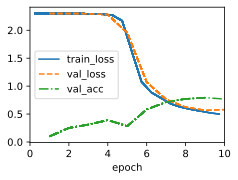

In [19]:
# GoogleNet 모델 생성
model = GoogleNet(lr=0.01)

# 학습 환경 설정
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)

# FashionMNIST 데이터 로드 및 전처리 설정
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))

# 초기화를 위한 데이터 샘플로 모델 가중치 초기화
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)

# 모델 훈련
trainer.fit(model, data)

# Residual Networks (ResNet) and ResNeXt

As we design ever deeper networks it becomes imperative to understand how adding layers can increase the complexity and expressiveness of the network. 

- 점점 더 깊은 네트워크를 설계할 때, 레이어를 추가하는 것이 네트워크의 복잡성과 표현 능력을 어떻게 증가시킬 수 있는지 이해하는 것이 중요해집니다.

Even more important is the ability to design networks where adding layers makes networks strictly more expressive rather than just different. 

- 더 중요한 것은 레이어를 추가함으로써 네트워크가 단순히 다르게만 되는 것이 아니라 엄격하게 더 표현력이 높은 네트워크를 설계하는 능력입니다.

To make some progress we need a bit of mathematics. 

- 어느 정도 진전을 이루기 위해서는 약간의 수학적 지식이 필요합니다.

## Function Classes

Consider $\mathcal{F}$, the class of functions that a specific network architecture (together with learning rates and other hyperparameter settings) can reach.

- $\mathcal{F}$를 고려해보겠습니다. $\mathcal{F}$는 특정 네트워크 아키텍처 (학습률 및 기타 하이퍼파라미터 설정과 함께)가 달성할 수 있는 함수의 클래스입니다.

That is, for all $f \in \mathcal{F}$ there exists some set of parameters (e.g., weights and biases) that can be obtained through training on a suitable dataset.

- 즉, 모든 $f \in \mathcal{F}$에 대해 적절한 데이터셋에 대한 훈련을 통해 얻을 수 있는 일부 매개변수 세트 (예: 가중치와 편향)가 존재합니다.

Let's assume that $f^*$ is the "truth" function that we really would like to find.

- $f^*$가 우리가 실제로 찾고 싶은 "진리(truth)" 함수라고 가정해봅시다.

If it is in $\mathcal{F}$, we are in good shape but typically we will not be quite so lucky.

- 만약 이 함수가 $\mathcal{F}$에 속한다면, 상당히 좋은 상태일 것입니다. 그러나 일반적으로 그렇게 운이 좋지 않을 것입니다.

Instead, we will try to find some $f^*_\mathcal{F}$ which is our best bet within $\mathcal{F}$.

- 대신, 우리는 $\mathcal{F}$ 내에서 최선의 선택인 $f^*_\mathcal{F}$를 찾으려고 할 것입니다.

For instance,given a dataset with features $\mathbf{X}$ and labels $\mathbf{y}$, we might try finding it by solving the following optimization problem:

- 예를 들어, 특징 $\mathbf{X}$와 레이블 $\mathbf{y}$가 있는 데이터셋이 있다면, 다음 최적화 문제를 풀어 $f^*_\mathcal{F}$를 찾아보려 할 수 있습니다:


$$f^*_\mathcal{F} \stackrel{\textrm{def}}{=} \mathop{\mathrm{argmin}}_f L(\mathbf{X}, \mathbf{y}, f) \textrm{ subject to } f \in \mathcal{F}.$$


As illustrated by figure below, for non-nested function classes, a larger function class does not always move closer to the "truth" function $f^*$. 

- 아래 그림에서 보듯이, 중첩되지 않은 함수 클래스의 경우, 더 큰 함수 클래스가 항상 "진리(truth)" 함수 $f^*$에 더 가까워지는 것은 아닙니다.

For instance, on the left of figure below, though $\mathcal{F}_3$ is closer to $f^*$ than $\mathcal{F}_1$, $\mathcal{F}_6$ moves away and there is no guarantee that further increasing the complexity can reduce the distance from $f^*$.

- 예를 들어, 아래 그림 왼쪽에서 $\mathcal{F}_3$이 $\mathcal{F}_1$보다 $f^$에 더 가까워 보이지만, $\mathcal{F}_6$은 멀어지며 복잡도를 더 늘린다고 해서 $f^$와의 거리가 줄어들리라는 보장은 없습니다.

With nested function classes where $\mathcal{F}_1 \subseteq \cdots \subseteq \mathcal{F}_6$ on the right of figure below, we can avoid the aforementioned issue from the non-nested function classes.

- 아래 그림 오른쪽에서 $\mathcal{F}_1 \subseteq \cdots \subseteq \mathcal{F}_6$와 같이 중첩된 함수 클래스의 경우, 비중첩된 함수 클래스에서 나타나는 문제를 피할 수 있습니다.

![For non-nested function classes, a larger (indicated by area) function class does not guarantee we will get closer to the "truth" function ($f^*$). This does not happen in nested function classes.](http://d2l.ai/_images/functionclasses.svg)

## Residual Blocks

Let's focus on a local part of a neural network, as depicted in figure below. Denote the input by $\mathbf{x}$.

- 아래 그림에서 보이는 신경망의 로컬 부분에 초점을 맞추겠습니다. 입력을 $\mathbf{x}$로 나타내겠습니다.

We assume that $f(\mathbf{x})$, the desired underlying mapping we want to obtain by learning, is to be used as input to the activation function on the top.

- 우리는 학습을 통해 얻고자 하는 원하는 기저(mapping)인 $f(\mathbf{x})$가 상단의 활성화 함수에 입력으로 사용될 것이라고 가정합니다.

On the left, the portion within the dotted-line box must directly learn $f(\mathbf{x})$. On the right, the portion within the dotted-line box needs to learn the *residual mapping* $g(\mathbf{x}) = f(\mathbf{x}) - \mathbf{x}$, which is how the residual block derives its name.

- 왼쪽의 점선 상자 안에 있는 부분은 $f(\mathbf{x})$를 직접 학습해야 합니다. 오른쪽의 점선 상자 안에 있는 부분은 *demptic mapping* $g(\mathbf{x}) = f(\mathbf{x}) - \mathbf{x}$를 학습해야 합니다. 이것은 잔차 블록이 자신의 이름을 유도하는 방법입니다.

If the identity mapping $f(\mathbf{x}) = \mathbf{x}$ is the desired underlying mapping, the residual mapping amounts to $g(\mathbf{x}) = 0$ and it is thus easier to learn: we only need to push the weights and biases of the upper weight layer (e.g., fully connected layer and convolutional layer) within the dotted-line box to zero.

- 만약 항등 매핑 $f(\mathbf{x}) = \mathbf{x}$이 원하는 기저 매핑이라면, 잔차 매핑은 $g(\mathbf{x}) = 0$이 되어 학습이 더 쉬워집니다. 우리는 단순히 점선 상자 내의 상단 가중치 레이어 (예: 완전 연결 레이어 및 합성곱 레이어)의 가중치와 편향을 0으로 밀어넣기만 하면 됩니다.

The right figure illustrates the *residual block* of ResNet, where the solid line carrying the layer input $\mathbf{x}$ to the addition operator is called a *residual connection* (or *shortcut connection*).

- 오른쪽 그림은 ResNet의 잔차 블록을 보여주며, 층 입력 $\mathbf{x}$을 덧셈 연산자로 전달하는 실선은 잔차 연결 (또는 shortcut 연결)이라고 부릅니다.

With residual blocks, inputs can forward propagate faster through the residual connections across layers.

- 잔차 블록을 사용하면 입력은 잔차 연결을 통해 빠르게 층을 통과할 수 있습니다.

![In a regular block (left), the portion within the dotted-line box must directly learn the mapping $f(\mathbf{x})$. In a residual block (right), the portion within the dotted-line box needs to learn the residual mapping $g(\mathbf{x}) = f(\mathbf{x}) - \mathbf{x}$, making the identity mapping $f(\mathbf{x}) = \mathbf{x}$ easier to learn.](https://d2l.ai/_images/residual-block.svg)

ResNet has VGG's full $3\times 3$ convolutional layer design.

- ResNet은 VGG의 전체 $3\times 3$ 컨볼루션 레이어 디자인을 채택하고 있습니다.

The residual block has two $3\times 3$ convolutional layers with the same number of output channels. 

- 잔차 블록은 두 개의 $3\times 3$ 컨볼루션 레이어를 가지며, 출력 채널 수도 동일합니다.

Each convolutional layer is followed by a batch normalization layer and a ReLU activation function.

- 각 컨볼루션 레이어 다음에는 배치 정규화 레이어와 ReLU 활성화 함수가 따릅니다.

Then, we skip these two convolution operations and add the input directly before the final ReLU activation function.

- 그런 다음, 이러한 두 컨볼루션 연산을 건너뛰고 최종 ReLU 활성화 함수 전에 입력을 직접 추가합니다.

This kind of design requires that the output of the two convolutional layers has to be of the same shape as the input, so that they can be added together. 

- 이러한 디자인은 두 컨볼루션 레이어의 출력이 입력과 동일한 모양이어야 하기 때문에, 그들을 함께 더할 수 있습니다.

If we want to change the number of channels, we need to introduce an additional $1\times 1$ convolutional layer to transform the input into the desired shape for the addition operation.

- 채널 수를 변경하려면 입력을 더하기 연산에 필요한 원하는 모양으로 변환하기 위해 추가적인 $1\times 1$ 컨볼루션 레이어를 도입해야 합니다.

In [20]:
class Residual(nn.Module):
    """ResNet 모델의 Residual 블록입니다."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1, stride=strides)  # 3x3 컨볼루션 레이어
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)  # 3x3 컨볼루션 레이어
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=strides) if use_1x1conv else None  # 필요에 따른 1x1 컨볼루션 레이어
        self.bn1 = nn.LazyBatchNorm2d()  # 배치 정규화 레이어
        self.bn2 = nn.LazyBatchNorm2d()  # 배치 정규화 레이어

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))  # 활성화 함수와 배치 정규화
        Y = self.bn2(self.conv2(Y))  # 배치 정규화
        if self.conv3:
            X = self.conv3(X)
        Y += X  # 스킵 연결
        return F.relu(Y)  # 활성화 함수 적용

This code generates two types of networks: one where we add the input to the output before applying the ReLU nonlinearity whenever `use_1x1conv=False`; and one where we adjust channels and resolution by means of a $1 \times 1$ convolution before adding. figure below illustrates this.


-  코드는 두 가지 유형의 네트워크를 생성합니다: use_1x1conv=False인 경우 ReLU 비선형성을 적용하기 전에 입력을 출력에 추가하고; $1 \times 1$ 컨볼루션을 사용하여 채널과 해상도를 조정한 후 추가하는 경우입니다. 아래 그림은 이를 설명합니다.

![ResNet block with and without $1 \times 1$ convolution, which transforms the input into the desired shape for the addition operation.](https://d2l.ai/_images/resnet-block.svg)

Now let's look at [**a situation where the input and output are of the same shape**], where $1 \times 1$ convolution is not needed.

- 이제 입력과 출력이 동일한 모양인 상황을 살펴보겠습니다. 이 경우 $1 \times 1$ 컨볼루션은 필요하지 않습니다.

In [21]:
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

torch.Size([4, 3, 6, 6])

We also have the option to [**halve the output height and width while increasing the number of output channels**].

- 또한 출력 높이와 너비를 반으로 줄이면서 출력 채널 수를 늘릴 수도 있습니다.

In this case we use $1 \times 1$ convolutions via `use_1x1conv=True`. This comes in handy at the beginning of each ResNet block to reduce the spatial dimensionality via `strides=2`.

- 이 경우 use_1x1conv=True를 통해 $1 \times 1$ 컨볼루션을 사용합니다. 이는 각 ResNet 블록의 시작 부분에서 공간 차원을 strides=2를 통해 줄이기 위해 유용합니다.

In [22]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

## ResNet Model

The first two layers of ResNet are the same as those of the GoogLeNet we described before: the $7\times 7$ convolutional layer with 64 output channels and a stride of 2 is followed by the $3\times 3$ max-pooling layer with a stride of 2. The difference is the batch normalization layer added after each convolutional layer in ResNet.


ResNet의 첫 두 레이어는 앞서 설명한 GoogLeNet과 동일합니다. 64개의 출력 채널과 2의 스트라이드를 가진 $7\times 7$ 컨볼루션 레이어가 $3\times 3$ 맥스 풀링 레이어와 2의 스트라이드를 따릅니다. 차이점은 ResNet에서 각 컨볼루션 레이어 뒤에 배치 정규화 레이어가 추가된 것입니다.

In [23]:
class ResNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),  # 7x7 컨볼루션 레이어
            nn.LazyBatchNorm2d(),  # 배치 정규화 레이어
            nn.ReLU(),  # 활성화 함수 (ReLU)
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))  # 3x3 맥스 풀링 레이어

GoogLeNet uses four modules made up of Inception blocks.

- GoogLeNet은 네 개의 인셉션 블록으로 이루어진 네 개의 모듈을 사용합니다.

However, ResNet uses four modules made up of residual blocks, each of which uses several residual blocks with the same number of output channels.

- 하지만 ResNet은 네 개의 잔차 블록으로 이루어진 네 개의 모듈을 사용하며, 각각의 모듈은 동일한 출력 채널 수를 가진 여러 잔차 블록을 사용합니다.

The number of channels in the first module is the same as the number of input channels. Since a max-pooling layer with a stride of 2 has already been used, it is not necessary to reduce the height and width. 

- 첫 번째 모듈의 채널 수는 입력 채널 수와 동일합니다. 스트라이드가 2인 맥스 풀링 레이어가 이미 사용되었으므로 높이와 너비를 줄일 필요가 없습니다.

In the first residual block for each of the subsequent modules, the number of channels is doubled compared with that of the previous module, and the height and width are halved.

- 각 후속 모듈의 첫 번째 잔차 블록에서는 채널 수가 이전 모듈과 비교하여 두 배로 증가하고, 높이와 너비는 반으로 감소됩니다.

In [24]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels))
    return nn.Sequential(*blk)

Then, we add all the modules to ResNet. Here, two residual blocks are used for each module. Lastly, just like GoogLeNet, we add a global average pooling layer, followed by the fully connected layer output.

- 그런 다음, 우리는 모든 모듈을 ResNet에 추가합니다. 여기서 각 모듈에는 두 개의 잔차 블록이 사용됩니다. 마지막으로, GoogLeNet과 마찬가지로 전역 평균 풀링 레이어를 추가하고, 그 뒤로 완전 연결 레이어 출력을 추가합니다.

In [25]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    
    # 첫 번째 블록 생성
    self.net = nn.Sequential(self.b1())
    
    # Residual 블록들 생성 및 추가
    for i, b in enumerate(arch):
        self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
    
    # 마지막 블록 생성 (Adaptive Average Pooling, Flatten, Fully Connected)
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    
    # 가중치 초기화
    self.net.apply(d2l.init_cnn)

There are four convolutional layers in each module (excluding the $1\times 1$ convolutional layer). Together with the first $7\times 7$ convolutional layer and the final fully connected layer, there are 18 layers in total.

- 각 모듈에는 $1\times 1$ 컨볼루션 레이어를 제외하고 총 네 개의 컨볼루션 레이어가 있습니다. 첫 번째 $7\times 7$ 컨볼루션 레이어와 마지막 완전 연결 레이어와 함께 총 18개의 레이어가 있습니다. 


Therefore, this model is commonly known as ResNet-18. Figure below depicts the full ResNet-18.
- 따라서 이 모델은 일반적으로 ResNet-18로 알려져 있습니다. 아래 그림은 전체 ResNet-18을 보여줍니다.


![The ResNet-18 architecture.](https://d2l.ai/_images/resnet18-90.svg)

Before training ResNet, let's [**observe how the input shape changes across different modules in ResNet**]. As in all the previous architectures, the resolution decreases while the number of channels increases up until the point where a global average pooling layer aggregates all features.

- ResNet을 훈련하기 전에, ResNet의 다른 모듈 간에 입력 모양이 어떻게 변하는지 [관찰]해보겠습니다. 이전 모든 아키텍처와 마찬가지로, 해상도는 감소하면서 채널 수는 증가하며 전역 평균 풀링 레이어가 모든 피처를 집계할 때까지 진행됩니다.

In [26]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

ResNet18().layer_summary((1, 1, 96, 96))# 입력 크기 (1, 1, 96, 96)로 레이어 요약 출력

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 128, 12, 12])
Sequential output shape:	 torch.Size([1, 256, 6, 6])
Sequential output shape:	 torch.Size([1, 512, 3, 3])
Sequential output shape:	 torch.Size([1, 10])


We train ResNet on the Fashion-MNIST dataset, just like before. ResNet is quite a powerful and flexible architecture. 

- 이전과 마찬가지로 Fashion-MNIST 데이터셋에서 ResNet을 훈련합니다. ResNet은 매우 강력하고 유연한 아키텍처입니다.

The plot capturing training and validation loss illustrates a significant gap between both graphs, with the training loss being considerably lower.

- 훈련 및 검증 손실을 기록한 플롯은 두 그래프 간에 상당한 차이를 보여주며, 훈련 손실이 상당히 낮습니다.

For a network of this flexibility, more training data would offer distinct benefit in closing the gap and improving accuracy.

- 이런 유연한 네트워크의 경우 더 많은 훈련 데이터는 차이를 줄이고 정확도를 향상시키는 데 명확한 이점을 제공할 것입니다.

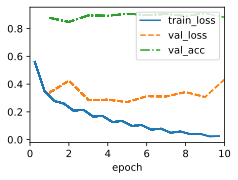

In [27]:
# ResNet18 모델 생성
model = ResNet18(lr=0.01)

# Trainer 객체 생성
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)

# 데이터 로딩 및 모델 초기화
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)

# 모델 학습
trainer.fit(model, data)

#  Densely Connected Networks (DenseNet)

DenseNet is characterized by both the connectivity pattern where each layer connects to all the preceding layers and the concatenation operation (rather than the addition operator in ResNet) to preserve and reuse features from earlier layers.

- DenseNet는 각 레이어가 이전 모든 레이어에 연결되는 연결 패턴과 이전 레이어에서 특징을 보존하고 재사용하기 위해 덧셈 연산자가 아닌 연결(concatenation) 연산을 사용하는 것으로 특징지어집니다.

## From ResNet to DenseNet

Recall the Taylor expansion for functions. At the point $x = 0$ it can be written as

- 함수에 대한 Taylor 확장을 상기하십시오. $x = 0$ 지점에서 다음과 같이 쓸 수 있습니다.

$$f(x) = f(0) + x \cdot \left[f'(0) + x \cdot \left[\frac{f''(0)}{2!}  + x \cdot \left[\frac{f'''(0)}{3!}  + \cdots \right]\right]\right].$$


The key point is that it decomposes a function into terms of increasingly higher order. In a similar vein, ResNet decomposes functions into

- 요점은 함수를 점점 더 높은 차원의 용어로 분해한다는 것입니다. 유사한 맥락에서 ResNet은 기능을 다음으로 분해합니다.

$$f(\mathbf{x}) = \mathbf{x} + g(\mathbf{x}).$$

That is, ResNet decomposes $f$ into a simple linear term and a more complex nonlinear one.

- 즉, ResNet은 $f$를 간단한 선형 항과 더 복잡한 비선형 항으로 분해합니다.

What if we wanted to capture (not necessarily add) information beyond two terms?

- 두 용어 이상의 정보를 캡처(반드시 추가할 필요는 없음)하려면 어떻게 해야 합니까?

One such solution is DenseNet :cite:`Huang.Liu.Van-Der-Maaten.ea.2017`.

- 그러한 솔루션 중 하나는 DenseNet :cit:`Huang.Liu.Van-Der-Maaten.ea.2017`입니다.

![The main difference between ResNet (left) and DenseNet (right) in cross-layer connections: use of addition and use of concatenation. ](https://d2l.ai/_images/densenet-block.svg)


As shown in Figure above, the key difference between ResNet and DenseNet is that in the latter case outputs are *concatenated* (denoted by $[,]$) rather than added. 

- 위의 그림에서 볼 수 있듯이 ResNet과 DenseNet의 주요 차이점은 후자의 경우 출력이 추가되지 않고 *연결*($[,]$로 표시됨)된다는 것입니다.

As a result, we perform a mapping from $\mathbf{x}$ to its values after applying an increasingly complex sequence of functions:

- 결과적으로 점점 더 복잡해지는 함수 시퀀스를 적용한 후 $\mathbf{x}$에서 해당 값으로 매핑을 수행합니다.

$$\mathbf{x} \to \left[
\mathbf{x},
f_1(\mathbf{x}),
f_2\left(\left[\mathbf{x}, f_1\left(\mathbf{x}\right)\right]\right), f_3\left(\left[\mathbf{x}, f_1\left(\mathbf{x}\right), f_2\left(\left[\mathbf{x}, f_1\left(\mathbf{x}\right)\right]\right)\right]\right), \ldots\right].$$

In the end, all these functions are combined in MLP to reduce the number of features again. 

- 결국 이러한 기능을 모두 MLP로 결합하여 기능 수를 다시 줄입니다.

In terms of implementation this is quite simple: rather than adding terms, we concatenate them. The name DenseNet arises from the fact that the dependency graph between variables becomes quite dense. 

- 구현 측면에서 이것은 매우 간단합니다. 용어를 추가하는 대신 용어를 연결합니다. DenseNet이라는 이름은 변수 간의 종속성 그래프가 상당히 조밀해진다는 사실에서 유래되었습니다.

The final layer of such a chain is densely connected to all previous layers. The dense connections are shown in figure below`.

- 이러한 체인의 마지막 레이어는 이전의 모든 레이어와 조밀하게 연결됩니다. 조밀한 연결은 아래 그림에 나와 있습니다.

![Dense connections in DenseNet. Note how the dimensionality increases with depth.](http://d2l.ai/_images/densenet.svg)

The main components that comprise a DenseNet are *dense blocks* and *transition layers*. The former define how the inputs and outputs are concatenated, while the latter control the number of channels so that it is not too large, since the expansion $\mathbf{x} \to \left[\mathbf{x}, f_1(\mathbf{x}), f_2\left(\left[\mathbf{x}, f_1\left(\mathbf{x}\right)\right]\right), \ldots \right]$ can be quite high-dimensional.

- DenseNet을 구성하는 주요 구성 요소는 *밀도 블록*과 *전환 레이어*입니다. 전자는 입력과 출력이 연결되는 방식을 정의하는 반면, 후자는 확장 $\mathbf{x} \to \left[\mathbf{x}, f_1(\ mathbf{x}), f_2\left(\left[\mathbf{x}, f_1\left(\mathbf{x}\right)\right]\right), \ldots \right]$는 매우 고차원적일 수 있습니다. .


## Dense Blocks

DenseNet uses the modified “batch normalization, activation, and convolution” structure of ResNet.

- DenseNet는 ResNet의 수정된 "배치 정규화, 활성화 및 컨볼루션" 구조를 사용합니다.


First, we implement this convolution block structure.

- 먼저, 이 컨볼루션 블록 구조를 구현합니다.

In [28]:
def conv_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(),  # 배치 정규화 레이어
        nn.ReLU(),             # ReLU 활성화 함수
        nn.LazyConv2d(num_channels, kernel_size=3, padding=1))# 컨볼루션 레이어

A dense block consists of multiple convolution blocks, each using the same number of output channels. 

- 덴스 블록은 여러 개의 컨볼루션 블록으로 구성되며, 각 블록은 동일한 출력 채널 수를 사용합니다.

In the forward propagation, however, we concatenate the input and output of each convolution block on the channel dimension. 

- 그러나 순방향 전파에서는 각 컨볼루션 블록의 입력과 출력을 채널 차원에 연결합니다.

Lazy evaluation allows us to adjust the dimensionality automatically.

- 지연 평가를 통해 차원성을 자동으로 조정할 수 있습니다.

In [29]:
class DenseBlock(nn.Module):
    def __init__(self, num_convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
             # 각 블록의 입력과 출력을 채널 방향으로 연결
            X = torch.cat((X, Y), dim=1)
        return X

In the following example, we [**define a `DenseBlock` instance**] with two convolution blocks of 10 output channels.

- 다음 예제에서는 10개의 출력 채널을 가진 두 개의 컨볼루션 블록으로 된 DenseBlock 인스턴스를 [정의합니다].

When using an input with three channels, we will get an output with  $3 + 10 + 10=23$ channels. The number of convolution block channels controls the growth in the number of output channels relative to the number of input channels. 

- 세 개의 채널을 가진 입력을 사용할 경우 출력은 $3 + 10 + 10=23$개의 채널을 가집니다. 컨볼루션 블록 채널 수는 입력 채널 수에 비해 출력 채널 수의 증가율을 제어합니다.

This is also referred to as the *growth rate*.

- 이는 성장률로도 표현됩니다.

In [30]:
blk = DenseBlock(2, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

## Transition Layers

Since each dense block will increase the number of channels, adding too many of them will lead to an excessively complex model. 

- 각각의 덴스 블록은 채널 수를 증가시키므로 많은 덴스 블록을 추가하면 너무 복잡한 모델이 될 수 있습니다.

A *transition layer* is used to control the complexity of the model. 

- *전환 레이어(transition layer)*는 모델의 복잡성을 조절하기 위해 사용됩니다.

It reduces the number of channels by using a $1\times 1$ convolution. 

- 전환 레이어는 $1\times 1$ 컨볼루션을 사용하여 채널 수를 줄입니다.

Moreover, it halves the height and width via average pooling with a stride of 2.

- 또한, 스트라이드가 2인 평균 풀링을 통해 높이와 너비를 반으로 줄입니다.

In [36]:
def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

Apply a transition layer with 10 channels to the output of the dense block in the previous example. This reduces the number of output channels to 10, and halves the height and width.

- 이전 예제의 덴스 블록 출력에 10개의 채널을 가지는 전환 레이어를 적용하세요. 이렇게 하면 출력 채널 수가 10으로 줄어들고, 높이와 너비가 반으로 줄어듭니다.

In [37]:
blk = transition_block(10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

## DenseNet Model

Next, we will construct a DenseNet model. DenseNet first uses the same single convolutional layer and max-pooling layer as in ResNet.

- 다음으로 DenseNet 모델을 구성하겠습니다. DenseNet은 먼저 ResNet과 마찬가지로 동일한 단일 컨볼루션 레이어와 맥스 풀링 레이어를 사용합니다.

In [39]:
class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),  # 7x7 컨볼루션 레이어
            nn.LazyBatchNorm2d(),          # 배치 정규화 레이어
            nn.ReLU(),                     # ReLU 활성화 함수
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))  # 3x3 최대 풀링 레이어

Then, similar to the four modules made up of residual blocks that ResNet uses, DenseNet uses four dense blocks. As with ResNet, we can set the number of convolutional layers used in each dense block.

- 그 다음, ResNet이 사용하는 잔차 블록으로 이루어진 네 개의 모듈과 유사하게, DenseNet은 네 개의 덴스 블록을 사용합니다. ResNet과 마찬가지로 각 덴스 블록에서 사용되는 컨볼루션 레이어의 개수를 설정할 수 있습니다. 

Here, we set it to 4, consistent with the ResNet-18 model. Furthermore, we set the number of channels (i.e., growth rate) for the convolutional layers in the dense block to 32, so 128 channels will be added to each dense block.

- 여기서는 ResNet-18 모델과 일치하게 4로 설정합니다. 또한, 덴스 블록 내 컨볼루션 레이어의 채널 수(즉, 증가율)를 32로 설정하여 각 덴스 블록에 128개의 채널이 추가됩니다.

In ResNet, the height and width are reduced between each module by a residual block with a stride of 2. Here, we use the transition layer to halve the height and width and halve the number of channels. Similar to ResNet, a global pooling layer and a fully connected layer are connected at the end to produce the output.

- ResNet에서 각 모듈 사이에서 높이와 너비는 스트라이드가 2인 잔차 블록을 통해 줄어듭니다. 여기서는 전환 레이어를 사용하여 높이와 너비를 반으로 줄이고 채널 수도 반으로 줄입니다. ResNet과 유사하게 전역 풀링 레이어와 완전 연결 레이어가 연결되어 출력을 생성합니다.

In [40]:
@d2l.add_to_class(DenseNet)
def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4),
             lr=0.1, num_classes=10):
    super(DenseNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, num_convs in enumerate(arch):
        self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs,
                                                          growth_rate))
        # 이전 Dense 블록의 출력 채널 수 업데이트
        num_channels += num_convs * growth_rate
        # 블록 사이에 출력 채널 수를 절반으로 줄이는 전이 레이어 추가
        if i != len(arch) - 1:
            num_channels //= 2
            self.net.add_module(f'tran_blk{i+1}', transition_block(
                num_channels))
    self.net.add_module('last', nn.Sequential(
        nn.LazyBatchNorm2d(),           # 배치 정규화 레이어
        nn.ReLU(),                      # ReLU 활성화 함수
        nn.AdaptiveAvgPool2d((1, 1)),    # Adaptive 평균 풀링 레이어
        nn.Flatten(),                   # 플래튼 레이어
        nn.LazyLinear(num_classes)))    # Linear 레이어
    self.net.apply(d2l.init_cnn)       # CNN 가중치 초기화

## Training

Since we are using a deeper network here, in this section, we will reduce the input height and width from 224 to 96 to simplify the computation.

- 여기에서 더 깊은 네트워크를 사용하고 있으므로 이 섹션에서는 계산을 단순화하기 위해 입력 높이와 너비를 224에서 96으로 줄입니다.

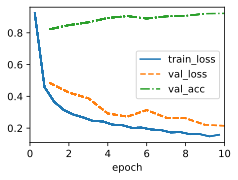

In [41]:
# DenseNet 모델 생성
model = DenseNet(lr=0.01)

# Trainer 객체 생성
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)

# 데이터 로딩
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))

# 모델 학습
trainer.fit(model, data)